# MNIST 데이터 셋을 이용한 손글씨 인식 Deep Nerual Network

아래와 같은 딥러닝의 여러기술을 써서 정확도를 올려보는 실습이다.
- ReLU
- Dropout
- Pre-training

## 1. Softmax Logistic Regression for MNIST

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import matplotlib.pyplot as plt

**Data 구조 조사**

In [2]:
mnist = input_data.read_data_sets("./MNIST_DATA", one_hot=True)

Extracting ./MNIST_DATA/train-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting ./MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.images.shape

(55000, 784)

In [4]:
mnist.test.images.shape

(10000, 784)

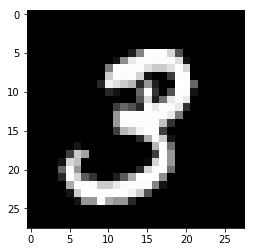

In [5]:
plt.imshow(mnist.train.images[1,0:784].reshape(28,28), cmap="gray", interpolation="nearest")
plt.show()

In [6]:
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1


# tensorflow graph input
X = tf.placeholder('float', [None, 784]) # mnist data image of shape 28 * 28 = 784
Y = tf.placeholder('float', [None, 10]) # 0-9 digits recognition = > 10 classes

# set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Our hypothesis
activation = tf.nn.softmax(tf.matmul(X, W) + b)  # Softmax


# Cost function: cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(activation), reduction_indices=[1]))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)  # Gradient Descen

# Before starting, initialize the variables. We will `run` this first.
init = tf.global_variables_initializer()

# plot data
training_cost = []

# Launch the graph,
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Fit the line.
        for step in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data

            sess.run(optimizer, feed_dict={X: batch_xs, Y: batch_ys})

            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={X: batch_xs, Y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' %(epoch+1), "Training Error", "{:.9f}".format(avg_cost))
            training_cost.append(avg_cost)
    print ("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    testing_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images[:200], Y: mnist.test.labels[:200]})
    print("Testing Accuracy","{:.9f}".format(testing_accuracy))


Epoch: 0001 Training Error 1.174406634
Epoch: 0002 Training Error 0.662057072
Epoch: 0003 Training Error 0.550561634
Epoch: 0004 Training Error 0.496714640
Epoch: 0005 Training Error 0.463682844
Epoch: 0006 Training Error 0.440900077
Epoch: 0007 Training Error 0.423956519
Epoch: 0008 Training Error 0.410594277
Epoch: 0009 Training Error 0.399815456
Epoch: 0010 Training Error 0.390898196
Epoch: 0011 Training Error 0.383272451
Epoch: 0012 Training Error 0.376738432
Epoch: 0013 Training Error 0.371002574
Epoch: 0014 Training Error 0.365890058
Epoch: 0015 Training Error 0.361362095
Epoch: 0016 Training Error 0.357240601
Epoch: 0017 Training Error 0.353524430
Epoch: 0018 Training Error 0.350102182
Epoch: 0019 Training Error 0.346980082
Epoch: 0020 Training Error 0.344145975
Epoch: 0021 Training Error 0.341433940
Epoch: 0022 Training Error 0.339001889
Epoch: 0023 Training Error 0.336689274
Epoch: 0024 Training Error 0.334503716
Epoch: 0025 Training Error 0.332440875
Optimization Finished!
Te

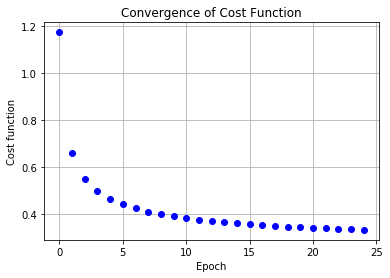

In [7]:
# cost function이 Convergence (수렴)하는 것을 그래프로 그려 본다.
def plotCost(jvec):
    plt.figure(figsize=(6,4))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Epoch")
    plt.ylabel("Cost function")

plotCost(training_cost)

## 2. Hidden Layer for MNIST


- Hidden Layer를 1개 추가한다.
- Vanishing Gradient 문제를 막기 위해서 ReLU Activation 함수를 사용한다.
- 초기 Weight는 `Random Normal`을 사용 한다.
    - 주의: 모두 0으로 초기화 하면 Wegiht update가 매번 같게 일어나므로 같은 Layer의 Wegiht들이 모두 같은 값을 가진다.

In [9]:
learning_rate = 0.01
training_epochs = 15
batch_size = 100
display_step = 1

mnist = input_data.read_data_sets("./MNIST_DATA", one_hot=True)
# tensorflow graph input
X = tf.placeholder('float', [None, 784]) # mnist data image of shape 28 * 28 = 784
Y = tf.placeholder('float', [None, 10]) # 0-9 digits recognition = > 10 classes

# set model weights
W1 = tf.Variable(tf.random_normal([784, 256]))
W2 = tf.Variable(tf.random_normal([256, 256]))
W3 = tf.Variable(tf.random_normal([256, 10]))

B1 = tf.Variable(tf.random_normal([256]))
B2 = tf.Variable(tf.random_normal([256]))
B3 = tf.Variable(tf.random_normal([10]))

# Construct model
L1 = tf.nn.relu(tf.add(tf.matmul(X,W1),B1))
L2 = tf.nn.relu(tf.add(tf.matmul(L1,W2),B2)) # Hidden layer with RELU activation
hypothesis = tf.add(tf.matmul(L2, W3), B3) # No need to use softmax here

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(hypothesis, Y)) # Softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph,
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Fit the line.
        for step in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # Fit training using batch data

            sess.run(optimizer, feed_dict={X: batch_xs, Y: batch_ys})

            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={X: batch_xs, Y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' %(epoch+1), "Training Error", "{:.9f}".format(avg_cost))

    print ("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Testing Accuracy", accuracy.eval({X: mnist.test.images[:200], Y: mnist.test.labels[:200]}))

Extracting ./MNIST_DATA/train-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting ./MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Training Error 36.593093674
Epoch: 0002 Training Error 5.910121407
Epoch: 0003 Training Error 2.620937956
Epoch: 0004 Training Error 1.630675664
Epoch: 0005 Training Error 1.090617501
Epoch: 0006 Training Error 0.881382546
Epoch: 0007 Training Error 0.655782079
Epoch: 0008 Training Error 0.605257626
Epoch: 0009 Training Error 0.633176358
Epoch: 0010 Training Error 0.511586016
Epoch: 0011 Training Error 0.400787890
Epoch: 0012 Training Error 0.335924118
Epoch: 0013 Training Error 0.319138830
Epoch: 0014 Training Error 0.255448152
Epoch: 0015 Training Error 0.236012056
Optimization Finished!
Testing Accuracy 0.97


## 3. Weight Initialization
- 최종 정확도는 큰 차이는 없지만 초기에 Cost 값이 매우 낮은것을 알 수 있다.
- converge 하는 시간을 줄일 수 있으며, 복잡한 Neural Net.을 성공적으로 학습 시킬 수 있는 가능성을 높인다. 

In [3]:
def xavier_initializer(n_inputs, n_outputs, uniform = True):
    if uniform:
        init_range = tf.sqrt(6.0/ (n_inputs + n_outputs))
        return tf.random_uniform_initializer(-init_range, init_range)

    else:
        stddev = tf.sqrt(3.0 / (n_inputs + n_outputs))
        return tf.truncated_normal_initializer(stddev=stddev)

In [3]:
def xavier_initializer(n_inputs, n_outputs, uniform = True):
    if uniform:
        init_range = tf.sqrt(6.0/ (n_inputs + n_outputs))
        return tf.random_uniform_initializer(-init_range, init_range)

    else:
        stddev = tf.sqrt(3.0 / (n_inputs + n_outputs))
        return tf.truncated_normal_initializer(stddev=stddev)

learning_rate = 0.01
training_epochs = 15
batch_size = 100
display_step = 1

mnist = input_data.read_data_sets("./MNIST_DATA", one_hot=True)
# tensorflow graph input
X = tf.placeholder('float', [None, 784]) # mnist data image of shape 28 * 28 = 784
Y = tf.placeholder('float', [None, 10]) # 0-9 digits recognition = > 10 classes

# set model weights
W_1 = tf.get_variable("W_1", shape=[784, 256], initializer=xavier_initializer(784, 256))
W_2 = tf.get_variable("W_2", shape=[256, 256], initializer=xavier_initializer(256, 256))
W_3 = tf.get_variable("W_3", shape=[256, 10], initializer=xavier_initializer(256, 10))


B1 = tf.Variable(tf.zeros([256]))
B2 = tf.Variable(tf.zeros([256]))
B3 = tf.Variable(tf.zeros([10]))

# Construct model
L1 = tf.nn.relu(tf.add(tf.matmul(X,W_1),B1))
L2 = tf.nn.relu(tf.add(tf.matmul(L1,W_2),B2)) # Hidden layer with RELU activation
hypothesis = tf.add(tf.matmul(L2, W_3), B3) # No need to use softmax here

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(hypothesis, Y)) # Softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph,
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Fit the line.
        for step in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # Fit training using batch data

            sess.run(optimizer, feed_dict={X: batch_xs, Y: batch_ys})

            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={X: batch_xs, Y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' %(epoch+1), "Training Error", "{:.9f}".format(avg_cost))

    print ("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Testing Accuracy", accuracy.eval({X: mnist.test.images[:200], Y: mnist.test.labels[:200]}))


Extracting ./MNIST_DATA/train-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting ./MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Training Error 0.200549736
Epoch: 0002 Training Error 0.095795567
Epoch: 0003 Training Error 0.075184118
Epoch: 0004 Training Error 0.063282279
Epoch: 0005 Training Error 0.055429216
Epoch: 0006 Training Error 0.054017108
Epoch: 0007 Training Error 0.051417416
Epoch: 0008 Training Error 0.044381755
Epoch: 0009 Training Error 0.039349482
Epoch: 0010 Training Error 0.042907008
Epoch: 0011 Training Error 0.040326667
Epoch: 0012 Training Error 0.034777870
Epoch: 0013 Training Error 0.037590372
Epoch: 0014 Training Error 0.035894262
Epoch: 0015 Training Error 0.033769305
Optimization Finished!
Testing Accuracy 0.98


## 4. Five-Layer Neural Net. with Dropout

In [4]:
learning_rate = 0.001
training_epochs = 25
batch_size = 100
display_step = 1

mnist = input_data.read_data_sets("./MNIST_DATA", one_hot=True)
# tensorflow graph input
X = tf.placeholder('float', [None, 784]) # mnist data image of shape 28 * 28 = 784
Y = tf.placeholder('float', [None, 10]) # 0-9 digits recognition = > 10 classes

# set dropout rate
dropout_rate = tf.placeholder("float")

# set model weights
W__1 = tf.get_variable("W__1", shape=[784, 256], initializer=xavier_initializer(784, 256))
W__2 = tf.get_variable("W__2", shape=[256, 256], initializer=xavier_initializer(256, 256))
W__3 = tf.get_variable("W__3", shape=[256, 256], initializer=xavier_initializer(256, 256))
W__4 = tf.get_variable("W__4", shape=[256, 256], initializer=xavier_initializer(256, 256))
W__5 = tf.get_variable("W__5", shape=[256, 10], initializer=xavier_initializer(256, 10))

B1 = tf.Variable(tf.random_normal([256]))
B2 = tf.Variable(tf.random_normal([256]))
B3 = tf.Variable(tf.random_normal([256]))
B4 = tf.Variable(tf.random_normal([256]))
B5 = tf.Variable(tf.random_normal([10]))

# Construct model
_L1 = tf.nn.relu(tf.add(tf.matmul(X,W__1),B1))
L1 = tf.nn.dropout(_L1, dropout_rate)
_L2 = tf.nn.relu(tf.add(tf.matmul(L1, W__2),B2)) # Hidden layer with ReLU activation
L2 = tf.nn.dropout(_L2, dropout_rate)
_L3 = tf.nn.relu(tf.add(tf.matmul(L2, W__3),B3)) # Hidden layer with ReLU activation
L3 = tf.nn.dropout(_L3, dropout_rate)
_L4 = tf.nn.relu(tf.add(tf.matmul(L3, W__4),B4)) # Hidden layer with ReLU activation
L4 = tf.nn.dropout(_L4, dropout_rate)

hypothesis = tf.add(tf.matmul(L4, W__5), B5) # No need to use softmax here

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(hypothesis, Y)) # Softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph,
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Fit the line.
        for step in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # Fit training using batch data
            # set up 0.7 for training time
            sess.run(optimizer, feed_dict={X: batch_xs, Y: batch_ys, dropout_rate: 0.7})

            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={X: batch_xs, Y: batch_ys, dropout_rate: 0.7})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' %(epoch+1), "Training Error", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Testing Accuracy", accuracy.eval({X: mnist.test.images[:200], Y: mnist.test.labels[:200], dropout_rate: 1}))

Extracting ./MNIST_DATA/train-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting ./MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Training Error 0.572801369
Epoch: 0002 Training Error 0.212843532
Epoch: 0003 Training Error 0.157949915
Epoch: 0004 Training Error 0.132224367
Epoch: 0005 Training Error 0.114936732
Epoch: 0006 Training Error 0.104187991
Epoch: 0007 Training Error 0.093045380
Epoch: 0008 Training Error 0.083886789
Epoch: 0009 Training Error 0.081845350
Epoch: 0010 Training Error 0.074718143
Epoch: 0011 Training Error 0.071650755
Epoch: 0012 Training Error 0.063617854
Epoch: 0013 Training Error 0.061668005
Epoch: 0014 Training Error 0.060254831
Epoch: 0015 Training Error 0.055920724
Epoch: 0016 Training Error 0.055071080
Epoch: 0017 Training Error 0.049940468
Epoch: 0018 Training Error 0.049623315
Epoch: 0019 Training Error 0.049239787
Epoch: 0020 Training Error 0.047966716
Epoch: 0021 Traini